# Importações

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [3]:
# Criação do dataframe 
df_censo = pd.read_csv('database_dropout.csv')

# Informações do dataframe
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130129 entries, 0 to 130128
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NO_REGIAO                       130129 non-null  object 
 1   SG_UF                           130129 non-null  object 
 2   CO_MUNICIPIO                    130129 non-null  float64
 3   NO_MUNICIPIO                    130129 non-null  object 
 4   CO_ENTIDADE                     130129 non-null  float64
 5   NO_ENTIDADE                     130129 non-null  object 
 6   NO_CATEGORIA                    130129 non-null  object 
 7   NO_DEPENDENCIA                  130129 non-null  object 
 8   TX_APROV_FUND                   130129 non-null  float64
 9   TX_APROV_MED                    130129 non-null  float64
 10  TX_REPR_FUND                    130129 non-null  float64
 11  TX_REPR_MED                     130129 non-null  float64
 12  TX_DIS_FUND     

# EDA

In [4]:
# Copiar DF para DF EDA
df_censo_eda = df_censo.copy()

# Converter para booleano
df_censo_eda['IN_INTERNET'] = df_censo_eda['IN_INTERNET'].astype(bool)
df_censo_eda['IN_SALA_PROFESSOR'] = df_censo_eda['IN_SALA_PROFESSOR'].astype(bool)
df_censo_eda['IN_AGUA_INEXISTENTE'] = df_censo_eda['IN_AGUA_INEXISTENTE'].astype(bool)
df_censo_eda['IN_ENERGIA_INEXISTENTE'] = df_censo_eda['IN_ENERGIA_INEXISTENTE'].astype(bool)
df_censo_eda['IN_ESGOTO_INEXISTENTE'] = df_censo_eda['IN_ESGOTO_INEXISTENTE'].astype(bool)
df_censo_eda['IN_AUDITORIO'] = df_censo_eda['IN_AUDITORIO'].astype(bool)
df_censo_eda['IN_BANHEIRO'] = df_censo_eda['IN_BANHEIRO'].astype(bool)
df_censo_eda['IN_BIBLIOTECA'] = df_censo_eda['IN_BIBLIOTECA'].astype(bool)
df_censo_eda['IN_LABORATORIO_INFORMATICA'] = df_censo_eda['IN_LABORATORIO_INFORMATICA'].astype(bool)
df_censo_eda['IN_PARQUE_INFANTIL'] = df_censo_eda['IN_PARQUE_INFANTIL'].astype(bool)
df_censo_eda['IN_PISCINA'] = df_censo_eda['IN_PISCINA'].astype(bool)
df_censo_eda['IN_REFEITORIO'] = df_censo_eda['IN_REFEITORIO'].astype(bool)
df_censo_eda['IN_SALA_LEITURA'] = df_censo_eda['IN_SALA_LEITURA'].astype(bool)
df_censo_eda['IN_SALA_PROFESSOR'] = df_censo_eda['IN_SALA_PROFESSOR'].astype(bool)
df_censo_eda['IN_ACESSIBILIDADE_INEXISTENTE'] = df_censo_eda['IN_ACESSIBILIDADE_INEXISTENTE'].astype(bool)
df_censo_eda['IN_QUADRA_ESPORTES'] = df_censo_eda['IN_QUADRA_ESPORTES'].astype(bool)

# converte  inteiros
df_censo_eda['IN_TRATAMENTO_LIXO_INEXISTENTE'] = df_censo_eda['IN_TRATAMENTO_LIXO_INEXISTENTE'].astype(int)
df_censo_eda['QT_SALAS_UTILIZADAS'] = df_censo_eda['QT_SALAS_UTILIZADAS'].astype(int)
df_censo_eda['QT_SALAS_UTILIZA_CLIMATIZADAS'] = df_censo_eda['QT_SALAS_UTILIZA_CLIMATIZADAS'].astype(int)
df_censo_eda['QT_SALAS_UTILIZADAS_ACESSIVEIS'] = df_censo_eda['QT_SALAS_UTILIZADAS_ACESSIVEIS'].astype(int)
df_censo_eda['TP_REDE_LOCAL'] = df_censo_eda['TP_REDE_LOCAL'].astype(int)
df_censo_eda['QT_PROF_ADMINISTRATIVOS'] = df_censo_eda['QT_PROF_ADMINISTRATIVOS'].astype(int)
df_censo_eda['QT_PROF_SERVICOS_GERAIS'] = df_censo_eda['QT_PROF_SERVICOS_GERAIS'].astype(int)
df_censo_eda['QT_PROF_BIBLIOTECARIO'] = df_censo_eda['QT_PROF_BIBLIOTECARIO'].astype(int)
df_censo_eda['QT_PROF_SAUDE'] = df_censo_eda['QT_PROF_SAUDE'].astype(int)
df_censo_eda['QT_PROF_SEGURANCA'] = df_censo_eda['QT_PROF_SEGURANCA'].astype(int)
df_censo_eda['QT_PROF_GESTAO'] = df_censo_eda['QT_PROF_GESTAO'].astype(int)
df_censo_eda['QT_SALAS_UTILIZADAS'] = df_censo_eda['QT_SALAS_UTILIZADAS'].astype(int)
df_censo_eda['QT_SALAS_UTILIZA_CLIMATIZADAS'] = df_censo_eda['QT_SALAS_UTILIZA_CLIMATIZADAS'].astype(int)
df_censo_eda['QT_SALAS_UTILIZADAS_ACESSIVEIS'] = df_censo_eda['QT_SALAS_UTILIZADAS_ACESSIVEIS'].astype(int)
df_censo_eda['QT_PROF_ALIMENTACAO'] = df_censo_eda['QT_PROF_ALIMENTACAO'].astype(int)

# convertendo dados categoricos
encoder = OrdinalEncoder(categories=[['Baixa','Moderada','Alta']])
df_censo_eda['TX_EV_TOT'] = encoder.fit_transform(df_censo_eda[['TX_EV_TOT']])
df_censo_eda['TX_EV_TOT'] = df_censo_eda['TX_EV_TOT'].astype(int)

# Visualização de dados

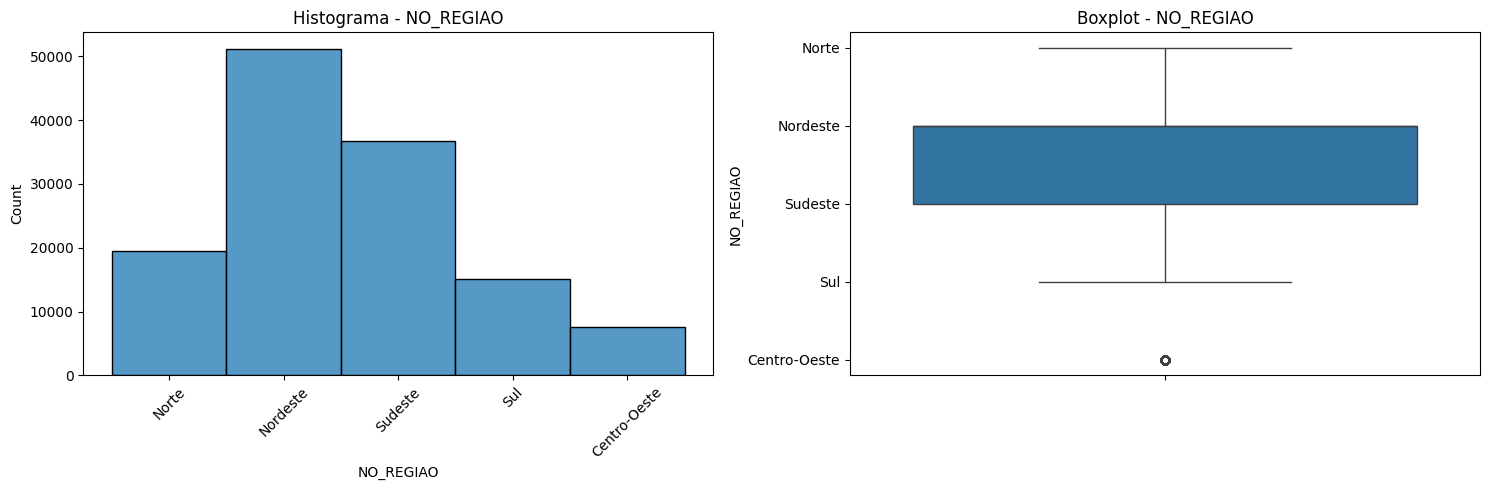

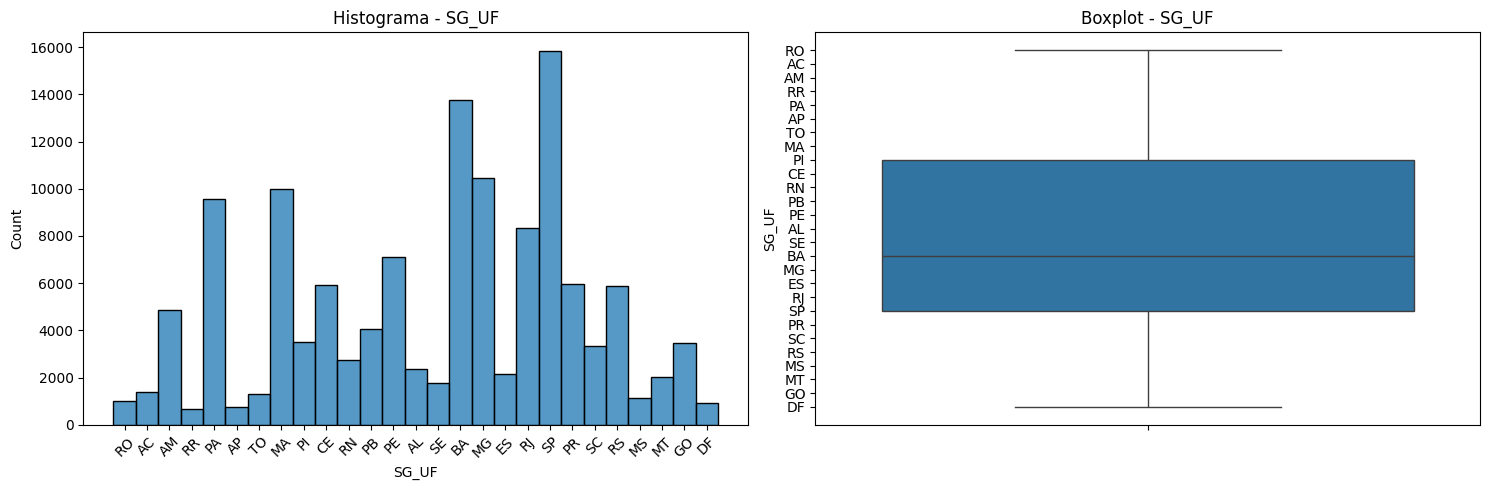

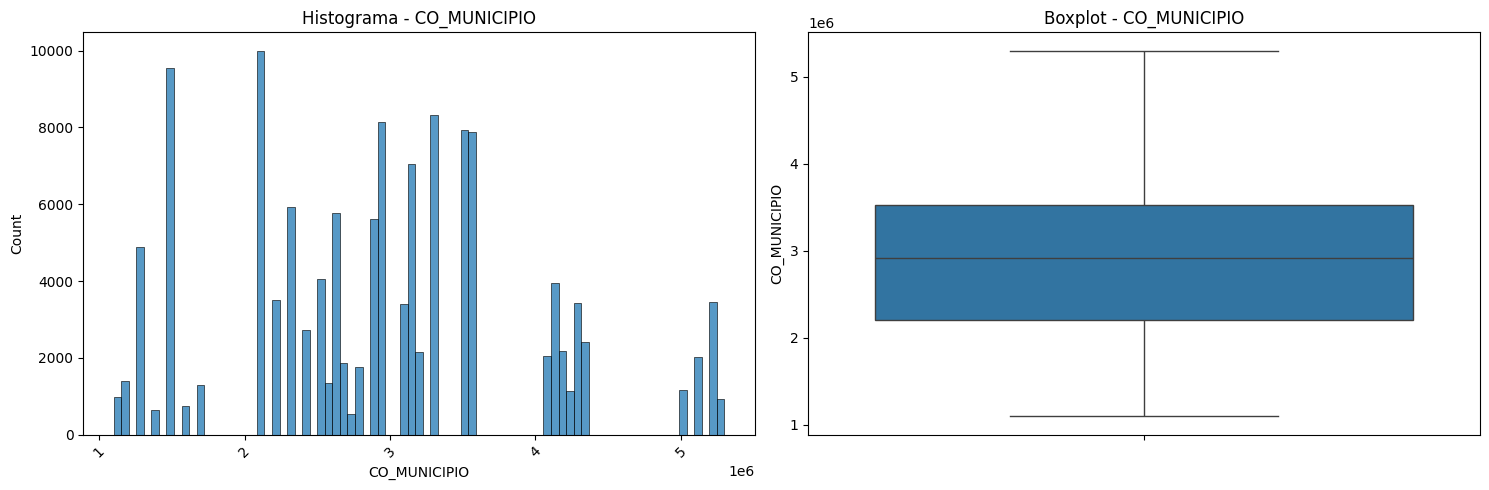

In [ ]:

df = df_censo_eda.select_dtypes(exclude=['bool'])
print(f'Visualizando gráficos de {len(df.columns)} colunas')
for col in df.columns:
    # Criar figura com dois subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plotar histograma
    sns.histplot(data=df_censo_eda, x=col, ax=ax1)
    ax1.set_title(f'Histograma - {col}')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plotar boxplot
    sns.boxplot(data=df_censo_eda, y=col, ax=ax2)
    ax2.set_title(f'Boxplot - {col}')
    
    plt.tight_layout()
    plt.show()